<a href="https://colab.research.google.com/github/akulkarni14/AAI-praticals/blob/main/inductive_logic_programming_system_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Training Complete!


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9940 (\N{NO ENTRY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


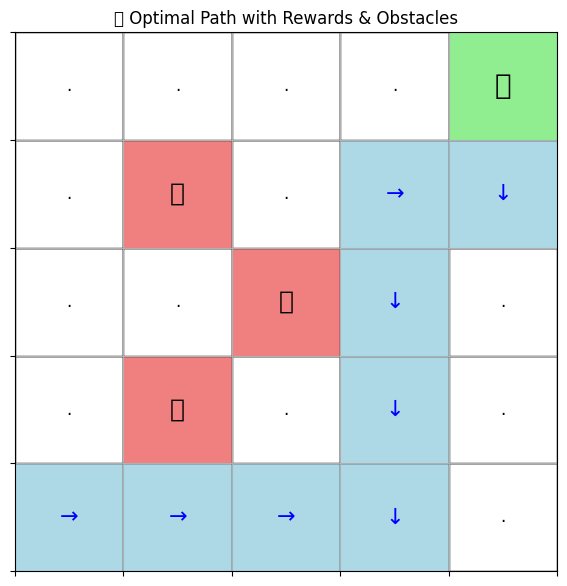

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


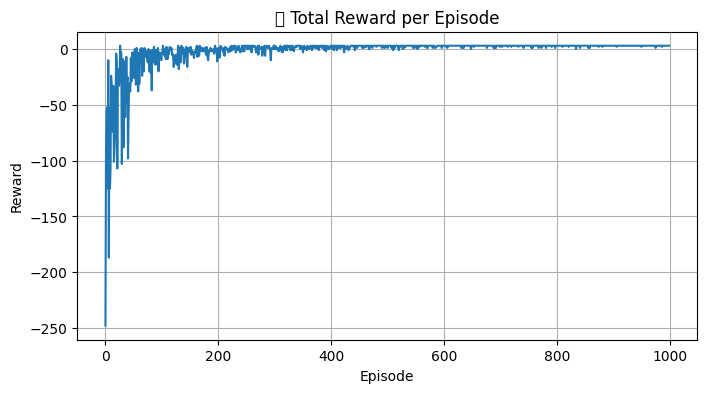

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

# Grid setup
GRID_SIZE = 5
goal_state = (4, 4)
obstacles = [(1, 1), (2, 2), (3, 1)]

# RL Parameters
EPISODES = 1000
LEARNING_RATE = 0.1
DISCOUNT = 0.95
EPSILON = 1.0
EPSILON_DECAY = 0.995
MIN_EPSILON = 0.01

# Actions: up, down, left, right
actions = {
    0: (-1, 0),  # up
    1: (1, 0),   # down
    2: (0, -1),  # left
    3: (0, 1)    # right
}
action_symbols = ['↑', '↓', '←', '→']

# Initialize Q-table
Q = np.zeros((GRID_SIZE, GRID_SIZE, len(actions)))

def get_next_state(state, action):
    r, c = state
    dr, dc = actions[action]
    next_r, next_c = r + dr, c + dc
    if (0 <= next_r < GRID_SIZE and 0 <= next_c < GRID_SIZE):
        if (next_r, next_c) not in obstacles:
            return (next_r, next_c)
    return state  # stays in same place if hit wall or obstacle

def get_reward(state):
    if state == goal_state:
        return 10
    elif state in obstacles:
        return -5
    else:
        return -1

# Train agent using Q-Learning
rewards_per_episode = []
for ep in range(EPISODES):
    state = (0, 0)
    total_reward = 0
    while state != goal_state:
        if random.uniform(0, 1) < EPSILON:
            action = random.randint(0, 3)
        else:
            action = np.argmax(Q[state[0], state[1]])
        next_state = get_next_state(state, action)
        reward = get_reward(next_state)
        total_reward += reward

        old_q = Q[state[0], state[1], action]
        next_max = np.max(Q[next_state[0], next_state[1]])
        Q[state[0], state[1], action] = old_q + LEARNING_RATE * (reward + DISCOUNT * next_max - old_q)

        state = next_state

    EPSILON = max(MIN_EPSILON, EPSILON * EPSILON_DECAY)
    rewards_per_episode.append(total_reward)

print("✅ Training Complete!")

# Extract optimal path from (0,0) to goal using learned Q-values
def extract_optimal_path():
    path = [(0, 0)]
    state = (0, 0)
    while state != goal_state:
        action = np.argmax(Q[state[0], state[1]])
        next_state = get_next_state(state, action)
        if next_state == state or next_state in path:
            break  # loop or stuck
        path.append(next_state)
        state = next_state
    return path

optimal_path = extract_optimal_path()

# ---------------------------------------------
# 🔲 Plot Chessboard Grid with Path, Rewards, Obstacles
# ---------------------------------------------
def plot_grid():
    fig, ax = plt.subplots(figsize=(7, 7))
    for r in range(GRID_SIZE):
        for c in range(GRID_SIZE):
            rect = patches.Rectangle((c, GRID_SIZE - r - 1), 1, 1,
                                     linewidth=1, edgecolor='black', facecolor='white')
            ax.add_patch(rect)

            pos = (r, c)

            if pos == goal_state:
                ax.text(c+0.5, GRID_SIZE-r-0.5, '🎯', ha='center', va='center', fontsize=20)
                ax.add_patch(patches.Rectangle((c, GRID_SIZE - r - 1), 1, 1, facecolor='lightgreen'))
            elif pos in obstacles:
                ax.text(c+0.5, GRID_SIZE-r-0.5, '⛔', ha='center', va='center', fontsize=18)
                ax.add_patch(patches.Rectangle((c, GRID_SIZE - r - 1), 1, 1, facecolor='lightcoral'))
            elif pos in optimal_path:
                best_action = np.argmax(Q[r, c])
                symbol = action_symbols[best_action]
                ax.text(c+0.5, GRID_SIZE-r-0.5, symbol, ha='center', va='center', fontsize=16, color='blue')
                ax.add_patch(patches.Rectangle((c, GRID_SIZE - r - 1), 1, 1, facecolor='lightblue'))
            else:
                ax.text(c+0.5, GRID_SIZE-r-0.5, '.', ha='center', va='center', fontsize=12)

    # Grid styling
    ax.set_xlim(0, GRID_SIZE)
    ax.set_ylim(0, GRID_SIZE)
    ax.set_xticks(np.arange(0, GRID_SIZE+1))
    ax.set_yticks(np.arange(0, GRID_SIZE+1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title("🔍 Optimal Path with Rewards & Obstacles")
    ax.grid(True)
    plt.gca().invert_yaxis()
    plt.show()

plot_grid()

# ---------------------------------------------
# 📈 Plot Learning Curve
# ---------------------------------------------
plt.figure(figsize=(8, 4))
plt.plot(rewards_per_episode)
plt.title("📉 Total Reward per Episode")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.grid(True)
plt.show()